# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets('/Users/saber/Documents/Code/deep-learning/source/mnist', validation_size=0)

Extracting /Users/saber/Documents/Code/deep-learning/source/mnist/train-images-idx3-ubyte.gz
Extracting /Users/saber/Documents/Code/deep-learning/source/mnist/train-labels-idx1-ubyte.gz
Extracting /Users/saber/Documents/Code/deep-learning/source/mnist/t10k-images-idx3-ubyte.gz
Extracting /Users/saber/Documents/Code/deep-learning/source/mnist/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

(784,)


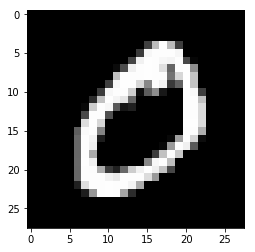

In [11]:
img = mnist.train.images[1]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [13]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, [None, 784], name='input')
targets_ = tf.placeholder(tf.float32, [None, 784], name='target')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, 784)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

## Training

In [14]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [15]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6935
Epoch: 1/20... Training loss: 0.6893
Epoch: 1/20... Training loss: 0.6852
Epoch: 1/20... Training loss: 0.6806
Epoch: 1/20... Training loss: 0.6744
Epoch: 1/20... Training loss: 0.6682
Epoch: 1/20... Training loss: 0.6592
Epoch: 1/20... Training loss: 0.6501
Epoch: 1/20... Training loss: 0.6396
Epoch: 1/20... Training loss: 0.6271
Epoch: 1/20... Training loss: 0.6140
Epoch: 1/20... Training loss: 0.5996
Epoch: 1/20... Training loss: 0.5844
Epoch: 1/20... Training loss: 0.5683
Epoch: 1/20... Training loss: 0.5493
Epoch: 1/20... Training loss: 0.5331
Epoch: 1/20... Training loss: 0.5151
Epoch: 1/20... Training loss: 0.4968
Epoch: 1/20... Training loss: 0.4790
Epoch: 1/20... Training loss: 0.4618
Epoch: 1/20... Training loss: 0.4426
Epoch: 1/20... Training loss: 0.4280
Epoch: 1/20... Training loss: 0.4086
Epoch: 1/20... Training loss: 0.4017
Epoch: 1/20... Training loss: 0.3914
Epoch: 1/20... Training loss: 0.3742
Epoch: 1/20... Training loss: 0.3604
E

Epoch: 1/20... Training loss: 0.1969
Epoch: 1/20... Training loss: 0.1878
Epoch: 1/20... Training loss: 0.1883
Epoch: 1/20... Training loss: 0.1880
Epoch: 1/20... Training loss: 0.1941
Epoch: 1/20... Training loss: 0.1907
Epoch: 1/20... Training loss: 0.1923
Epoch: 1/20... Training loss: 0.1865
Epoch: 1/20... Training loss: 0.1939
Epoch: 1/20... Training loss: 0.1927
Epoch: 1/20... Training loss: 0.1955
Epoch: 1/20... Training loss: 0.1914
Epoch: 1/20... Training loss: 0.1877
Epoch: 1/20... Training loss: 0.1811
Epoch: 1/20... Training loss: 0.1933
Epoch: 1/20... Training loss: 0.1931
Epoch: 1/20... Training loss: 0.1909
Epoch: 1/20... Training loss: 0.1887
Epoch: 1/20... Training loss: 0.1899
Epoch: 1/20... Training loss: 0.1864
Epoch: 1/20... Training loss: 0.1893
Epoch: 1/20... Training loss: 0.1871
Epoch: 1/20... Training loss: 0.1910
Epoch: 1/20... Training loss: 0.1861
Epoch: 1/20... Training loss: 0.1903
Epoch: 1/20... Training loss: 0.1892
Epoch: 1/20... Training loss: 0.1910
E

Epoch: 2/20... Training loss: 0.1517
Epoch: 2/20... Training loss: 0.1532
Epoch: 2/20... Training loss: 0.1464
Epoch: 2/20... Training loss: 0.1510
Epoch: 2/20... Training loss: 0.1530
Epoch: 2/20... Training loss: 0.1557
Epoch: 2/20... Training loss: 0.1539
Epoch: 2/20... Training loss: 0.1539
Epoch: 2/20... Training loss: 0.1538
Epoch: 2/20... Training loss: 0.1524
Epoch: 2/20... Training loss: 0.1536
Epoch: 2/20... Training loss: 0.1549
Epoch: 2/20... Training loss: 0.1561
Epoch: 2/20... Training loss: 0.1558
Epoch: 2/20... Training loss: 0.1534
Epoch: 2/20... Training loss: 0.1529
Epoch: 2/20... Training loss: 0.1521
Epoch: 2/20... Training loss: 0.1482
Epoch: 2/20... Training loss: 0.1526
Epoch: 2/20... Training loss: 0.1530
Epoch: 2/20... Training loss: 0.1599
Epoch: 2/20... Training loss: 0.1537
Epoch: 2/20... Training loss: 0.1538
Epoch: 2/20... Training loss: 0.1533
Epoch: 2/20... Training loss: 0.1519
Epoch: 2/20... Training loss: 0.1585
Epoch: 2/20... Training loss: 0.1475
E

Epoch: 3/20... Training loss: 0.1325
Epoch: 3/20... Training loss: 0.1377
Epoch: 3/20... Training loss: 0.1350
Epoch: 3/20... Training loss: 0.1306
Epoch: 3/20... Training loss: 0.1346
Epoch: 3/20... Training loss: 0.1306
Epoch: 3/20... Training loss: 0.1371
Epoch: 3/20... Training loss: 0.1310
Epoch: 3/20... Training loss: 0.1306
Epoch: 3/20... Training loss: 0.1319
Epoch: 3/20... Training loss: 0.1364
Epoch: 3/20... Training loss: 0.1316
Epoch: 3/20... Training loss: 0.1343
Epoch: 3/20... Training loss: 0.1338
Epoch: 3/20... Training loss: 0.1372
Epoch: 3/20... Training loss: 0.1346
Epoch: 3/20... Training loss: 0.1334
Epoch: 3/20... Training loss: 0.1367
Epoch: 3/20... Training loss: 0.1323
Epoch: 3/20... Training loss: 0.1321
Epoch: 3/20... Training loss: 0.1334
Epoch: 3/20... Training loss: 0.1313
Epoch: 3/20... Training loss: 0.1323
Epoch: 3/20... Training loss: 0.1366
Epoch: 3/20... Training loss: 0.1333
Epoch: 3/20... Training loss: 0.1311
Epoch: 3/20... Training loss: 0.1335
E

Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1156
Epoch: 4/20... Training loss: 0.1190
Epoch: 4/20... Training loss: 0.1193
Epoch: 4/20... Training loss: 0.1215
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1212
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1212
Epoch: 4/20... Training loss: 0.1206
Epoch: 4/20... Training loss: 0.1201
Epoch: 4/20... Training loss: 0.1222
Epoch: 4/20... Training loss: 0.1251
Epoch: 4/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1208
Epoch: 4/20... Training loss: 0.1191
Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1188
Epoch: 4/20... Training loss: 0.1183
Epoch: 4/20... Training loss: 0.1155
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1151
Epoch: 4/20... Training loss: 0.1203
Epoch: 4/20... Training loss: 0.1280
E

Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1131
Epoch: 5/20... Training loss: 0.1157
Epoch: 5/20... Training loss: 0.1135
Epoch: 5/20... Training loss: 0.1157
Epoch: 5/20... Training loss: 0.1124
Epoch: 5/20... Training loss: 0.1125
Epoch: 5/20... Training loss: 0.1132
Epoch: 5/20... Training loss: 0.1144
Epoch: 5/20... Training loss: 0.1146
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1142
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1126
Epoch: 5/20... Training loss: 0.1133
Epoch: 5/20... Training loss: 0.1166
Epoch: 5/20... Training loss: 0.1131
Epoch: 5/20... Training loss: 0.1137
Epoch: 5/20... Training loss: 0.1177
Epoch: 5/20... Training loss: 0.1145
Epoch: 5/20... Training loss: 0.1155
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1144
Epoch: 5/20... Training loss: 0.1135
E

Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1060
Epoch: 5/20... Training loss: 0.1082
Epoch: 5/20... Training loss: 0.1060
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1026
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1054
Epoch: 5/20... Training loss: 0.1027
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1077
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1091
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1137
Epoch: 6/20... Training loss: 0.1023
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1092
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1055
E

Epoch: 6/20... Training loss: 0.1013
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1018
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1018
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1021
Epoch: 6/20... Training loss: 0.1021
Epoch: 6/20... Training loss: 0.1028
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1026
Epoch: 6/20... Training loss: 0.1020
Epoch: 6/20... Training loss: 0.1010
Epoch: 6/20... Training loss: 0.0990
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1091
Epoch: 6/20... Training loss: 0.1019
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1011
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1010
E

Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.0973
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.0978
Epoch: 7/20... Training loss: 0.0986
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.0973
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.0981
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1032
E

Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0959
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0943
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0956
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0939
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.1005
E

Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0913
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0935
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0991
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0936
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0993
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0944
Epoch: 9/20... Training loss: 0.0991
E

Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.1013
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0921
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20

Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0998
Epoch: 10/20... Training loss: 0.0931
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0931
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0987
Epoch: 10/20... Training loss: 0.0916
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0920
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0974
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0907
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0917
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0984
Epoch: 11/20... Training loss: 0.0998
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0980
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0990
Epoch: 12/20... Training loss: 0.0981
Epoch: 12/20... Training loss: 0.0913
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0980
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0975
Epoch: 12/20... Training loss: 0.0914
Epoch: 12/20... Training loss: 0.0920
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0880
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0980
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0975
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0915
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0964
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0975
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0999
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0897
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0913
Epoch: 15/20... Training loss: 0.0972
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0903
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0982
Epoch: 15/20... Training loss: 0.0963
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0890
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0909
Epoch: 15/20... Training loss: 0.0905
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0889
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0985
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0972
Epoch: 15/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0883
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0910
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0975
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0964
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0969
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0888
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0994
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0973
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0900
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0904
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0997
Epoch: 18/20... Training loss: 0.0971
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0903
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0902
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0903
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0895
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0904
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0971
Epoch: 20/20... Training loss: 0.0999
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0903
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0971
Epoch: 20/20... Training loss: 0.0909
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0900
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0899
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0889
Epoch: 20/20... Training loss: 0.0909
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0986
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0892
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0956


## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

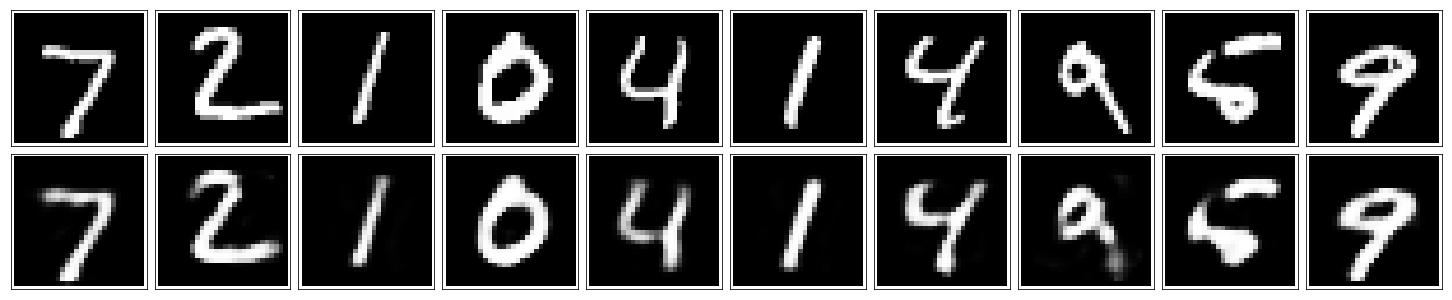

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.